In [2]:
import numpy as np
from random import *
from numpy.random import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation

In [3]:
#Constants
J = 1 
T = 1
N = 30   # size of lattice 
kB = 1
beta = 1/(kB*T)

In [4]:
def total_energy(grid, J=1):
    vertical = np.sum(grid[:-1,:]*grid[1:, :])
    horizontal = np.sum(grid[:,:-1]*grid[:,1:])
    return -J*(vertical+horizontal)
    

In [5]:
def metropolis( lattice, oldE) : 
    # flip a random spin and calculate $dE$
    i, j = randint( N, size=2 )
    lattice[i,j] *= -1    # flip the ij spin
    E = total_energy(lattice, J=1)
    deltaE = E - oldE

    # these are the Metropolis tests 
    if deltaE < 0 : 
        # keep the flipped spin because it lowers the energy
        return lattice, E
    if rand() < np.exp( - deltaE / T ) : 
        # keep the spin flip because the random number is less than $e^{-dE/T}$
        return lattice, E

    # the spin flip is rejected 
    lattice[i,j] *= -1    # flip the ij spin back
    E = oldE        # and keep the old energy
    return lattice, E



Non-animated Ising

In [6]:
# Initialize initial spin lattice
spins = np.random.choice([1,-1], (N,N))

#MC parameters
steps = 1000000

E = total_energy(spins,J)
energies = [E]

for step in range(steps):
    spins, E = metropolis(spins, E)
    energies.append(E)


plt.imshow(spins)
plt.colorbar()
print('Overall magnetization:', np.sum(spins))

KeyboardInterrupt: 

TypeError: 'tuple' object is not callable

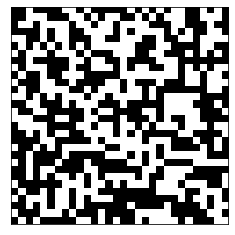

In [12]:
N=30        #number of spins 
steps = 100000
def initIsing(N):
    global isingImage, spinLattice

    # this is the initial, random, t=0, state
    spinLattice = np.random.choice([1,-1], (N,N))
    
    isingImage = plt.imshow(spinLattice, interpolation='none', cmap='gray')
    return ( isingImage, )

def animateIsing(i) : 
    global isingImage, spinLattice 
    
    E = total_energy( spinLattice ) 
    for i in range(steps) : 
        spinLattice, E = metropolis( spinLattice, E ) 
    isingImage.set_data( spinLattice ) 
    return ( isingImage, ) 

# i'm using little m metropolis from above instead of this function
def Metropolis( s, i ) : 
    # this should update isingData for t=t[i] using the Metropolis algorithm
    isingData = rand( N, N )  < i / (2*n) + 0.5 
    return isingData 
    
def makeAnimation( T, n ) : 
    # set up the figure
    fig = plt.figure()
    plt.subplot( )
    plt.xticks( [] )
    plt.yticks( [] )
    # plt.title( r'$k_{\rm B}T/J=%3.2f$' % T )
    # and create the animation
    anim = FuncAnimation(fig, animateIsing, init_func=initIsing(N),
                                frames=n, interval=20, blit=True)
    return anim

n = 100000
T = 1
anim = makeAnimation(T, n//steps) # because animateIsing() runs metropolis() steps times

HTML( anim.to_html5_video() )

TypeError: 'tuple' object is not callable

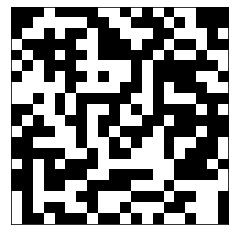

In [20]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation
L=N 
def initIsing(N):
    global isingImage, spinLattice

    # this is the initial, random, t=0, state
    spinLattice = np.random.choice([1,-1], (N,N))
    
    isingImage = plt.imshow(spinLattice, interpolation='none', cmap='gray')
    return isingImage,

def animateIsing(i) : 
    global isingImage, spinLattice 
    
    E = total_energy( spinLattice ) 
    for i in range(steps) : 
        spinLattice, E = metropolis( spinLattice, E ) 
    isingImage.set_data( spinLattice ) 
    return isingImage, 

# i'm using little m metropolis from above instead of this function
def Metropolis( s, i ) : 
    # this should update isingData for t=t[i] using the Metropolis algorithm
    isingData = rand( N, N )  < i / (2*n) + 0.5 
    return isingData 
    
def makeAnimation( T, n ) : 
    # set up the figure
    fig = plt.figure( )
    plt.subplot( )
    plt.xticks( [] )
    plt.yticks( [] )
    # and create the animation
    anim = FuncAnimation(fig, animateIsing, init_func=initIsing(20),
                                frames=n, interval=250, blit=True)
    return anim

n = 100000
T = 1
anim = makeAnimation(T,n//(N*N)) # because animateIsing() runs metropolis() L*L times

HTML( anim.to_html5_video() )

In [ ]:
def createLattice( L ) : 
    """
        Creates an LxL lattice of random spins, $s_{ij} = \pm 1$.
    """
    return ( rand( L, L ) < 0.5 ) * 2 - 1  # more Boolean jujutsu